In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def neighbor_benchmark(ran=20):
   
    score = pd.DataFrame(columns= ['train_score', 'valid_score'])    
    for i in range(ran):
        model = make_pipeline(
                    StandardScaler(),
                    KNeighborsClassifier(n_neighbors= i+1))
        
        model.fit(X_train, y_train)
        score = score.append({'train_score': model.score(X_train, y_train), 
                              'valid_score': model.score(X_valid, y_valid)},
                               ignore_index=True)
        
    return score

def decision_tree_benchmark(ran=20):
   
    score = pd.DataFrame(columns= ['train_score', 'valid_score'])    
    for i in range(ran):
        model = make_pipeline(
                    StandardScaler(),
                    DecisionTreeClassifier(max_depth= i+1))
        
        model.fit(X_train, y_train)
        score = score.append({'train_score': model.score(X_train, y_train), 
                              'valid_score': model.score(X_valid, y_valid)},
                               ignore_index=True)
        
    return score

def gaussian_benchmark(ran=20):
   
    score = pd.DataFrame(columns= ['train_score', 'valid_score'])    
    for i in range(ran):
        model = make_pipeline(
                    StandardScaler(),
                    GaussianNB())
        
        model.fit(X_train, y_train)
        score = score.append({'train_score': model.score(X_train, y_train), 
                              'valid_score': model.score(X_valid, y_valid)},
                               ignore_index=True)
        
    return score

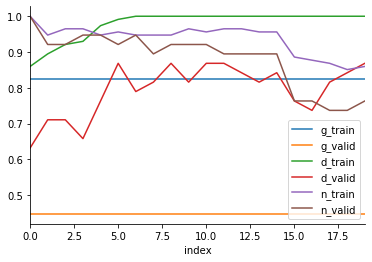

In [4]:
# Import all data
fall_data = pd.read_csv("data-processed/processed_fall_data.csv")
drop_data = pd.read_csv("data-processed/processed_drop_data.csv")
sit_data  = pd.read_csv("data-processed/processed_sit_data.csv" )
lie_data  = pd.read_csv("data-processed/processed_lie_data.csv" )

# Clean up messy columns
fall_data = fall_data.drop('Unnamed: 0', axis=1)
drop_data = drop_data.drop('Unnamed: 0', axis=1)
sit_data  = sit_data.drop( 'Unnamed: 0', axis=1)
lie_data  = lie_data.drop( 'Unnamed: 0', axis=1)

# Append column denoting whether it was a fall or not
fall_data['is_fall'] = True
drop_data['is_fall'] = False
sit_data ['is_fall'] = False
lie_data ['is_fall'] = False

# Concatanate all data into a single DataFrame
all_data = pd.concat([fall_data, drop_data, sit_data, lie_data])

# Split into X and y
X = all_data[['avg_aT', 'avg_ax', 'avg_ay', 'avg_az', 'max_aT', 
              'max_ax', 'max_ay', 'max_az']].copy().values
y = all_data['is_fall'].copy()

# Train/test split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

# Make models and benchmark
gauss = gaussian_benchmark()
dec_t = decision_tree_benchmark()
neigh = neighbor_benchmark()

# Add indices for later comparisons
gauss['index'] = gauss.index
dec_t['index'] = dec_t.index
neigh['index'] = neigh.index

# Plot benchmark results
fig, ax = plt.subplots()
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
gauss.plot(kind='line', x='index', y='train_score', ax=ax, label='g_train')
gauss.plot(kind='line', x='index', y='valid_score', ax=ax, label='g_valid')
dec_t.plot(kind='line', x='index', y='train_score', ax=ax, label='d_train')
dec_t.plot(kind='line', x='index', y='valid_score', ax=ax, label='d_valid')
neigh.plot(kind='line', x='index', y='train_score', ax=ax, label='n_train')
neigh.plot(kind='line', x='index', y='valid_score', ax=ax, label='n_valid')
#plt.savefig('benchmark_plot.png')
plt.show()

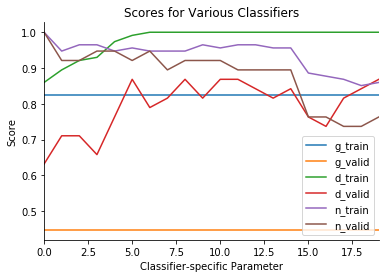

In [6]:
# Plot benchmark results
fig, ax = plt.subplots()
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
gauss.plot(kind='line', x='index', y='train_score', ax=ax, label='g_train')
gauss.plot(kind='line', x='index', y='valid_score', ax=ax, label='g_valid')
dec_t.plot(kind='line', x='index', y='train_score', ax=ax, label='d_train')
dec_t.plot(kind='line', x='index', y='valid_score', ax=ax, label='d_valid')
neigh.plot(kind='line', x='index', y='train_score', ax=ax, label='n_train')
neigh.plot(kind='line', x='index', y='valid_score', ax=ax, label='n_valid')
plt.title('Scores for Various Classifiers')
plt.xlabel('Classifier-specific Parameter')
plt.ylabel('Score')
plt.show()
# plt.savefig('benchmark_plot.png')